In [102]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/drive")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:

# Importing Libraries in code
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import sys
import pickle

# Reading bank.csv file
insurance_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank.csv")
insurance_data.head()


,Year,Serial_No,BankName,Rating,PeoplePurchased
0,1963,1,IDBI,2,11
1,1964,2,ICICI,3,9
2,1965,3,AXIS,4,20
3,1967,4,HDFC,5,21
4,1969,5,Yes,1,5


In [104]:
# Reading user.csv File
user=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/user.csv")
user.head()

,Age,Gender,Name,Serial_No
0,18,Male,Raj,1
1,20,Female,Priyal,2
2,22,Male,Dan,3
3,24,Female,Jiva,4
4,26,Male,kiaq,5


In [105]:
# Merging both files with Serial_No
main_data = pd.merge(insurance_data, user, on='Serial_No')
main_data.head()


,Year,Serial_No,BankName,Rating,PeoplePurchased,Age,Gender,Name
0,1963,1,IDBI,2,11,18,Male,Raj
1,1964,2,ICICI,3,9,20,Female,Priyal
2,1965,3,AXIS,4,20,22,Male,Dan
3,1967,4,HDFC,5,21,24,Female,Jiva
4,1969,5,Yes,1,5,26,Male,kiaq


In [106]:
# Grouping data of the main_data from below criteria
main_data.groupby('BankName')['PeoplePurchased'].mean().head()


BankName
AXIS     15.000000
Citi     17.666667
HDFC     14.227273
ICICI    32.760000
IDBI     11.411765
Name: PeoplePurchased, dtype: float64

In [107]:
# Getting data with maximum value
main_data.groupby('BankName')['PeoplePurchased'].mean().sort_values(ascending=False).head()


BankName
ICICI    32.760000
Citi     17.666667
AXIS     15.000000
HDFC     14.227273
SBI      12.454545
Name: PeoplePurchased, dtype: float64

In [108]:
# Finalizing
main_data.groupby('BankName')['PeoplePurchased'].count().sort_values(ascending=False).head()


BankName
SBI      44
ICICI    25
HDFC     22
Citi     18
IDBI     17
Name: PeoplePurchased, dtype: int64

In [109]:
#Accuracy of data with filtering user
purchase_count = pd.DataFrame(main_data.groupby('BankName')['PeoplePurchased'].mean())
purchase_count['people_Count'] = pd.DataFrame(main_data.groupby('BankName')['PeoplePurchased'].count())
purchase_count.head()


,PeoplePurchased,people_Count
BankName,,
AXIS,15.000000,2
Citi,17.666667,18
HDFC,14.227273,22
ICICI,32.760000,25
IDBI,11.411765,17


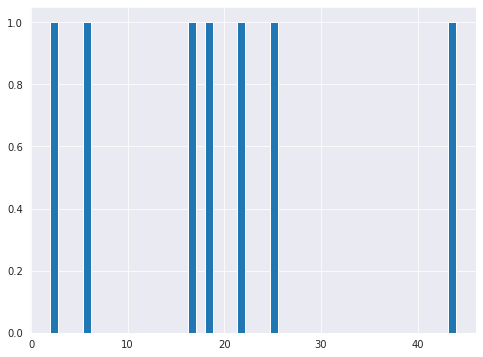

In [110]:
# Plotting user with maximum purchase
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
purchase_count['people_Count'].hist(bins=50)

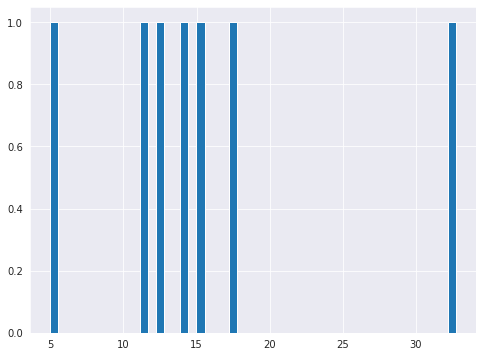

In [111]:
# Accuracy of data 
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
purchase_count['PeoplePurchased'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

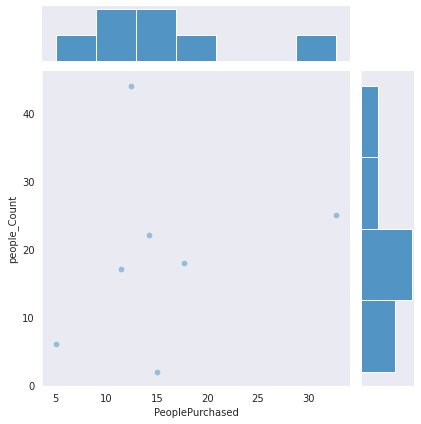

In [112]:
# Data join plotting with probability i.e. conditional and join probablity with alpha=0.1...0.4
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='PeoplePurchased', y='people_Count', data=purchase_count, alpha=0.4)

In [113]:
# Indexing table
user_review = main_data.pivot_table(index='Serial_No', columns='BankName', values='PeoplePurchased')
user_review.head()


BankName,AXIS,Citi,HDFC,ICICI,IDBI,SBI,Yes
Serial_No,,,,,,,
1,NaN,NaN,NaN,NaN,11.0,NaN,NaN
2,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,21.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [114]:
# Getting final data for particular bank for each user as per age group
policy = user_review['HDFC']
policy.head()


Serial_No
1     NaN
2     NaN
3     NaN
4    21.0
5     NaN
Name: HDFC, dtype: float64

In [126]:
# Correlation of similar age group with data filtering as per age and gender
prob = user_review.corrwith(policy)

cond = pd.DataFrame(prob, columns=['Correlation'])
cond.dropna(inplace=True)
cond.head()

,Correlation
BankName,
HDFC,1.0


In [127]:
cond.sort_values('Correlation', ascending=False).head(10)


,Correlation
BankName,
HDFC,1.0


In [128]:
# Final output sorting age , gender, popularity, rating all together
cond = cond.join(purchase_count['people_Count'])
cond.head()


,Correlation,people_Count
BankName,,
HDFC,1.0,22
